In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedinuserprofiles/LinkedIn people profiles datasets.csv


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/linkedinuserprofiles/LinkedIn people profiles datasets.csv')

# Display the first few rows of the dataframe
df.head()


,timestamp,id,name,city,country_code,region,current_company:company_id,current_company:name,position,following,...,people_also_viewed,educations_details,education,avatar,languages,certifications,recommendations,recommendations_count,volunteer_experience,сourses
0,2023-01-10,catherinemcilkenny,"Catherine Fitzpatrick (McIlkenny), B.A",Canada,CA,NaN,NaN,NaN,Snr Business Analyst at Emploi et Développemen...,NaN,...,"[{""profile_link"":""https://ca.linkedin.com/in/l...",Queen's University Belfast,"[{""degree"":""Bachelor of Arts (B.A.) Honours"",""...",https://media.licdn.com/dms/image/C4E03AQEcz_j...,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-17,margot-bon-51a04624,Margot Bon,"The Randstad, Netherlands",NL,EU,gemeente-utrecht,Gemeente Utrecht,Communicatieadviseur Corporate & Strategie Gem...,NaN,...,"[{""profile_link"":""https://nl.linkedin.com/in/j...",NaN,"[{""degree"":""Scrum en Agile werken"",""end_year"":...",https://static.licdn.com/sc/h/244xhbkr7g40x6bs...,"[{""subtitle"":""Professional working proficiency...","[{""meta"":""Issued Jun 2013"",""subtitle"":""Van der...",Menno H. Poort “Ik werk al jaren prettig met M...,2.0,"[{""cause"":"""",""duration"":""Sep 2010 Jul 2020 9 y...",NaN
2,2023-05-17,mike-dean-8509a193,Mike Dean,"England, United Kingdom",UK,NaN,network-rail,Network Rail,Network Data Manager at Network Rail,NaN,...,"[{""profile_link"":""https://uk.linkedin.com/in/g...",Brighton Polytechnic,"[{""degree"":""2:2"",""end_year"":""1991"",""field"":""El...",https://media.licdn.com/dms/image/C4D03AQHLj-Z...,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-29,giovanna-panarella-99a0a4167,Giovanna Panarella,"Avellino, Campania, Italy",IT,EU,NaN,Freelance,Architetto (Freelance),500.0,...,"[{""profile_link"":""https://it.linkedin.com/in/e...",Università di Camerino,"[{""degree"":""“Corso di aggiornamento profession...",https://media-exp1.licdn.com/dms/image/C4D03AQ...,NaN,NaN,NaN,NaN,"[{""cause"":""Arts and Culture"",""duration"":""Jan 2...",NaN
4,2022-12-06,steve-latimer-3364327,Steve Latimer,"Ontario, Canada",CA,NaN,mid-range-computer-group-inc.,Mid-Range Computer Group Inc.,Senior Account Executive at Mid-Range Computer...,NaN,...,"[{""profile_link"":""https://ca.linkedin.com/in/d...",St. Michael's College School,"[{""degree"":"""",""end_year"":""1978"",""field"":"""",""me...",NaN,NaN,"[{""meta"":""Issued Jan 2022 See credential"",""sub...","Blake Reeves “If I was a customer, I would wan...",1.0,NaN,NaN


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


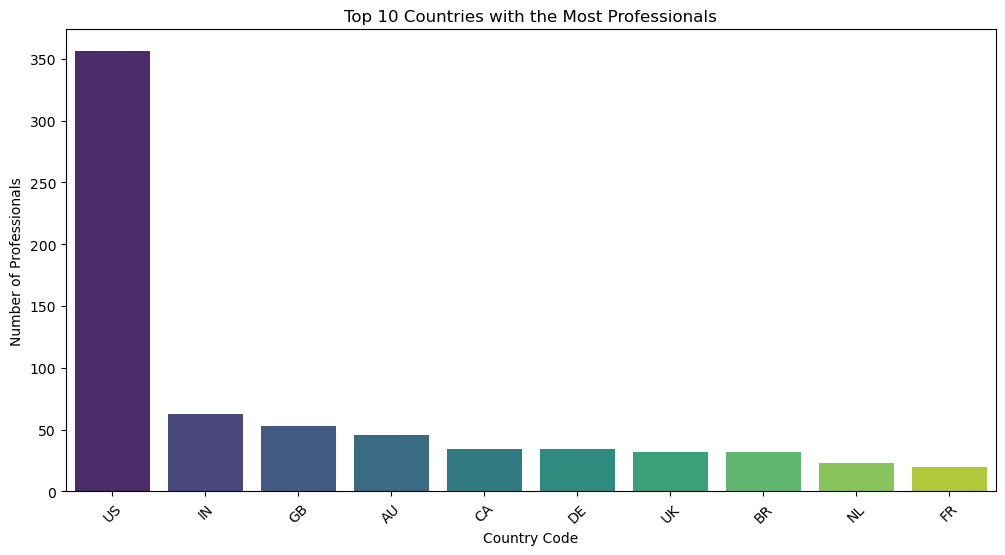

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'country_code' is NaN
df_country = df.dropna(subset=['country_code'])

# Get the top 10 countries with the most professionals
top_countries = df_country['country_code'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with the Most Professionals')
plt.xlabel('Country Code')
plt.ylabel('Number of Professionals')
plt.xticks(rotation=45)
plt.show()


**Here is a bar plot of the top 10 countries with the most professionals. The country codes on the x-axis represent the countries, and the y-axis represents the number of professionals.**

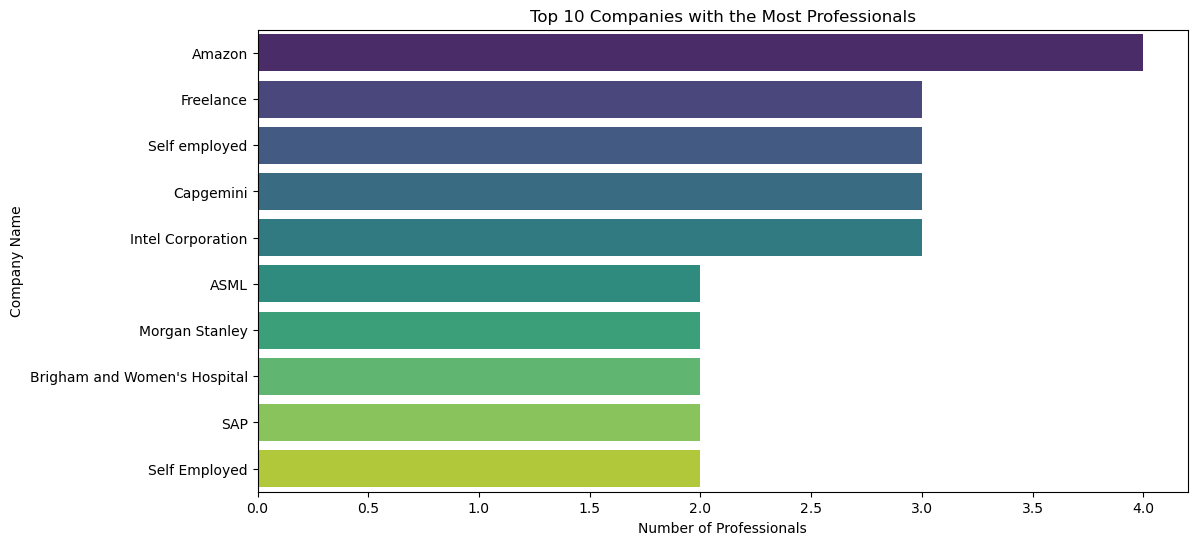

In [4]:
# Drop rows where 'current_company:name' is NaN
df_company = df.dropna(subset=['current_company:name'])

# Get the top 10 companies with the most professionals
top_companies = df_company['current_company:name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_companies.index, x=top_companies.values, palette='viridis')
plt.title('Top 10 Companies with the Most Professionals')
plt.xlabel('Number of Professionals')
plt.ylabel('Company Name')
plt.show()


**Here is a bar plot of the top 10 companies with the most professionals. The company names on the y-axis represent the companies, and the x-axis represents the number of professionals.**

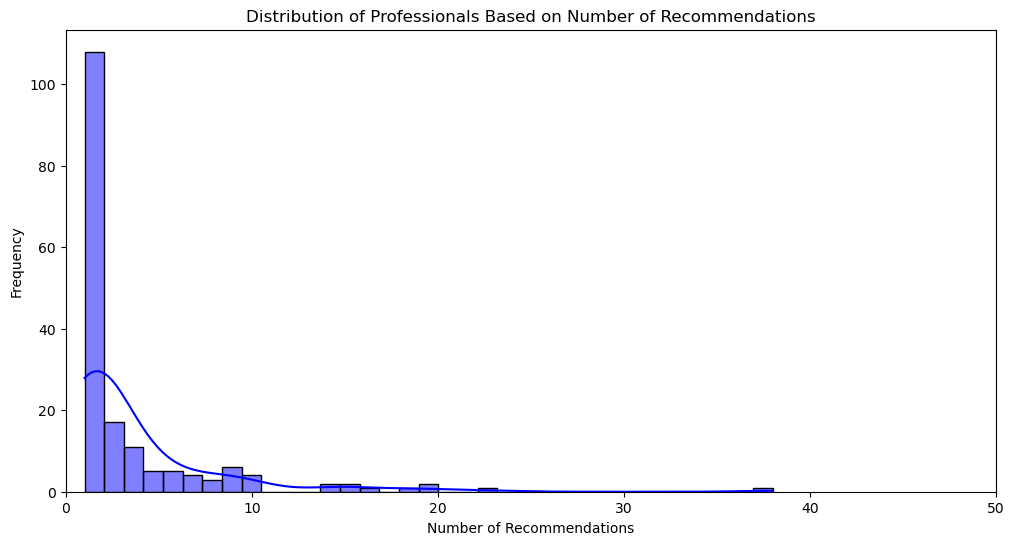

In [5]:
# Drop rows where 'recommendations_count' is NaN
df_recommendations = df.dropna(subset=['recommendations_count'])

plt.figure(figsize=(12, 6))
sns.histplot(df_recommendations['recommendations_count'], kde=True, color='b')
plt.title('Distribution of Professionals Based on Number of Recommendations')
plt.xlabel('Number of Recommendations')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Limit x-axis to 50 as there are some outliers with a very high number of recommendations
plt.show()


**Here is a histogram of the distribution of professionals based on the number of recommendations received. The x-axis represents the number of recommendations, and the y-axis represents the frequency of professionals.**

> Most professionals have received less than 10 recommendations, with the distribution being heavily right-skewed.

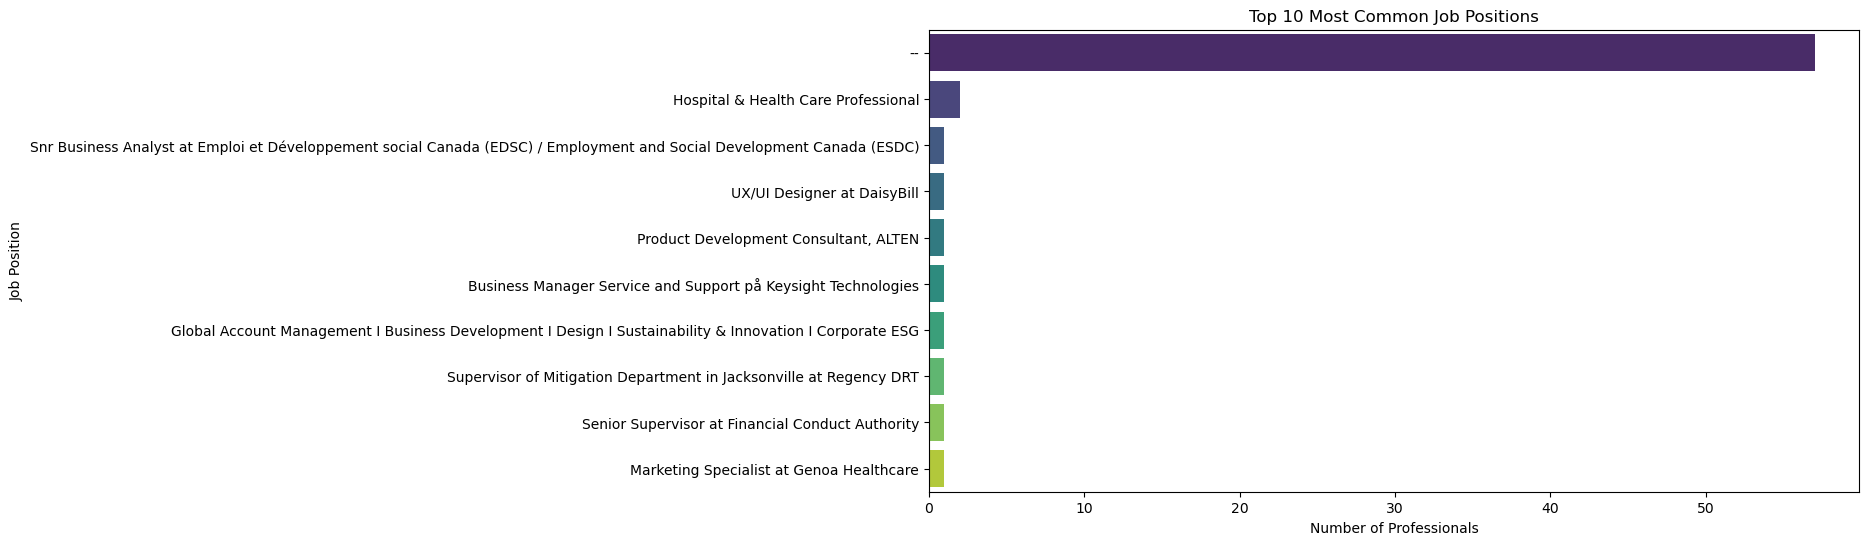

In [6]:
# Drop rows where 'position' is NaN
df_position = df.dropna(subset=['position'])

# Get the top 10 most common job positions
top_positions = df_position['position'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_positions.index, x=top_positions.values, palette='viridis')
plt.title('Top 10 Most Common Job Positions')
plt.xlabel('Number of Professionals')
plt.ylabel('Job Position')
plt.show()


**Here is a bar plot of the top 10 most common job positions among the professionals in the dataset. The job positions on the y-axis represent the positions, and the x-axis represents the number of professionals.**

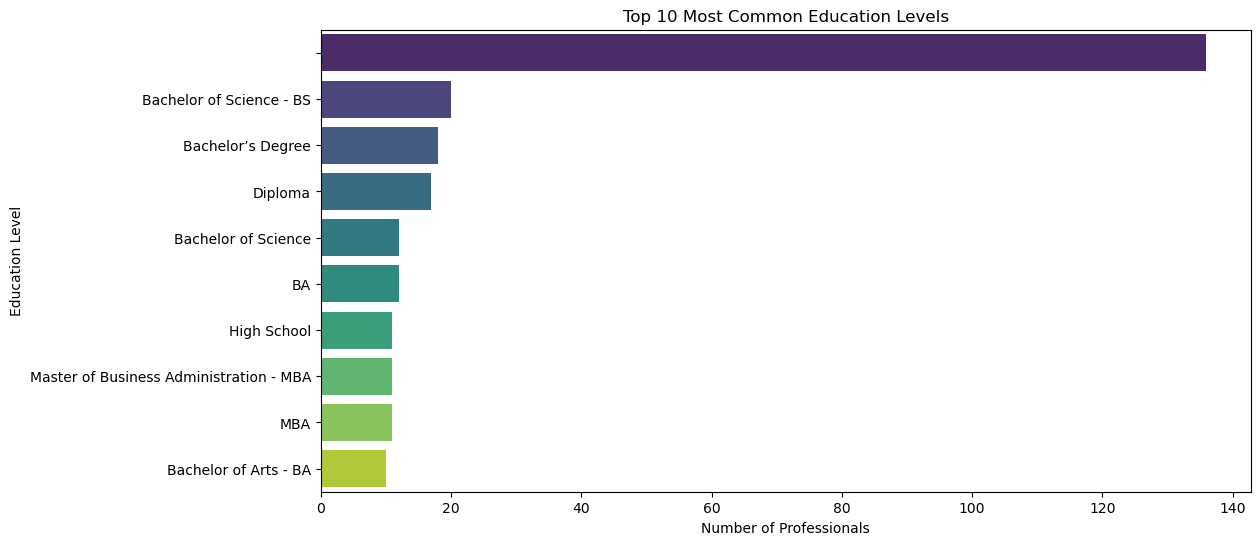

In [7]:
import json

# Drop rows where 'education' is NaN
df_education = df.dropna(subset=['education'])

# Function to extract education levels from 'education' column
def extract_education_levels(education_str):
    try:
        education_list = json.loads(education_str.replace("'", '"'))
        return [edu['degree'] for edu in education_list if 'degree' in edu]
    except:
        return []

# Extract education levels and create a list of all education levels
all_education_levels = []
for education_str in df_education['education']:
    all_education_levels.extend(extract_education_levels(education_str))

# Get the top 10 most common education levels
top_education_levels = pd.Series(all_education_levels).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_education_levels.index, x=top_education_levels.values, palette='viridis')
plt.title('Top 10 Most Common Education Levels')
plt.xlabel('Number of Professionals')
plt.ylabel('Education Level')
plt.show()


**Here is a bar plot of the top 10 most common education levels among the professionals in the dataset. The education levels on the y-axis represent the levels, and the x-axis represents the number of professionals.**

In [8]:
# Drop unnecessary columns
columns_to_drop = ['timestamp', 'id', 'region', 'current_company:company_id', 'people_also_viewed',
                    'avatar', 'recommendations', 'recommendations_count', 'volunteer_experience', 'сourses',
                    'following', 'groups', 'certifications']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Drop rows with missing values in 'current_company:name' and 'position'
df_cleaned = df_cleaned.dropna(subset=['current_company:name', 'position'])

# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

df_cleaned.head()


,name,city,country_code,current_company:name,position,about,posts,current_company,experience,url,educations_details,education,languages
0,Margot Bon,"The Randstad, Netherlands",NL,Gemeente Utrecht,Communicatieadviseur Corporate & Strategie Gem...,Allround Marketing & Communicatie Adviseur met...,"[{""attribution"":""Liked by Margot Bon"",""img"":""h...","{""company_id"":""gemeente-utrecht"",""industry"":""G...","[{""company"":""Gemeente Utrecht"",""company_id"":""g...",https://www.linkedin.com/in/margot-bon-51a04624,NaN,"[{""degree"":""Scrum en Agile werken"",""end_year"":...","[{""subtitle"":""Professional working proficiency..."
1,Mike Dean,"England, United Kingdom",UK,Network Rail,Network Data Manager at Network Rail,Experienced Data Manager with a demonstrated h...,NaN,"{""company_id"":""network-rail"",""link"":""https://s...","[{""company"":""Network Rail"",""company_id"":""netwo...",https://www.linkedin.com/in/mike-dean-8509a193,Brighton Polytechnic,"[{""degree"":""2:2"",""end_year"":""1991"",""field"":""El...",NaN
2,Giovanna Panarella,"Avellino, Campania, Italy",IT,Freelance,Architetto (Freelance),NaN,"[{""attribution"":""Liked by Giovanna Panarella"",...","{""link"":null,""name"":""Freelance""}","[{""company"":""Freelance"",""company_id"":null,""loc...",https://www.linkedin.com/in/giovanna-panarella...,Università di Camerino,"[{""degree"":""“Corso di aggiornamento profession...",NaN
3,Steve Latimer,"Ontario, Canada",CA,Mid-Range Computer Group Inc.,Senior Account Executive at Mid-Range Computer...,NaN,"[{""attribution"":""Liked by Steve Latimer"",""link...","{""company_id"":""mid-range-computer-group-inc."",...","[{""company"":""Mid-Range Computer Group Inc."",""c...",https://www.linkedin.com/in/steve-latimer-3364327,St. Michael's College School,"[{""degree"":"""",""end_year"":""1978"",""field"":"""",""me...",NaN
4,Manuela Dias,"Madrid, Community of Madrid, Spain",ES,Ericsson,Operational Excellence & Internal Control Mana...,NaN,NaN,"{""company_id"":""ericsson"",""industry"":""IT Servic...","[{""company"":""Ericsson"",""company_id"":""ericsson""...",https://www.linkedin.com/in/manuela-dias-b868b29b,NaN,NaN,"[{""subtitle"":""-"",""title"":""Español""},{""subtitle..."


In [9]:
import plotly.express as px

# Get the top 10 most common job positions
top_positions = df_cleaned['position'].value_counts().head(10)

# Create interactive bar plot
fig = px.bar(
    x=top_positions.index,
    y=top_positions.values,
    labels={'x': 'Job Position', 'y': 'Number of Professionals'},
    title='Top 10 Most Common Job Positions'
)

fig.update_traces(marker_color='rgba(0, 100, 80, 0.6)', marker_line_color='rgba(0, 100, 80, 1)', marker_line_width=1.5)
fig.update_layout(xaxis_title='Job Position', yaxis_title='Number of Professionals', title_x=0.5, template='plotly_white')
fig.update_xaxes(tickangle=45)

fig.show()


In [10]:
# Get the top 10 companies with the most professionals
top_companies = df_cleaned['current_company:name'].value_counts().head(10)

# Create interactive bar plot
fig = px.bar(
    x=top_companies.index,
    y=top_companies.values,
    labels={'x': 'Company', 'y': 'Number of Professionals'},
    title='Top 10 Companies with the Most Professionals'
)

fig.update_traces(marker_color='rgba(0, 100, 80, 0.6)', marker_line_color='rgba(0, 100, 80, 1)', marker_line_width=1.5)
fig.update_layout(xaxis_title='Company', yaxis_title='Number of Professionals', title_x=0.5, template='plotly_white')
fig.update_xaxes(tickangle=45)

fig.show()
